In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.1 MB/s eta 0:00:00


In [2]:
import mysql.connector
import pandas as pd

In [3]:
host = '34.69.233.123'
user = ''
password =''
database = 'locadora'

In [4]:
!curl ipecho.net/plain

34.139.206.74

In [5]:
def consulta(query, tabela):
  connection = mysql.connector.connect(
      host = host,
      user = user,
      password = password,
      database = database
  )
  cursor = connection.cursor()

  try:
    cursor.execute(query)
    result = cursor.fetchall()
    globals()[tabela] = pd.DataFrame(result, columns=cursor.column_names)
    display(globals()[tabela])
  finally:
    cursor.close()
    connection.close()

In [6]:
consulta('''
SHOW TABLES;
''','''tabelas_locadora''')

,Tables_in_locadora
0,aluguel
1,carro
2,cliente
3,marca


In [7]:
consulta('''
SELECT *
FROM aluguel;
''','''aluguel''')

,codaluguel,codcliente,codcarro,data_aluguel
0,1,3,2,2023-04-01
1,2,2,1,2023-04-02
2,3,2,1,2023-04-03
3,4,2,3,2023-04-04
4,5,1,4,2023-04-05
5,6,1,4,2023-04-13
6,7,1,1,2023-04-15
7,8,5,2,2023-04-19
8,9,5,2,2023-04-21
9,10,3,1,2023-04-25


In [8]:
consulta('''
SELECT *
FROM carro;
''','''carro''')

,codcarro,codmarca,modelo,valor
0,1,1,Ka,100.0
1,2,2,Argo,150.0
2,3,3,Onix,170.0
3,4,4,Polo,150.0
4,5,5,Kwid,120.0


In [9]:
consulta('''
SELECT *
FROM cliente;
''','''cliente''')

,codcliente,nome,cidade,sexo,estado,estadocivil
0,1,Ana Silva,Duque de Caxias,F,RJ,C
1,2,Bruna Pereira,Niterói,F,RJ,C
2,3,Túlio Nascimento,Duque de Caxias,M,RJ,S
3,4,Fernando Souza,Campinas,M,SP,S
4,5,Lúcia Andrade,São Paulo,F,SP,C


In [10]:
consulta('''
SELECT *
FROM marca;
''','''marca''')

,codmarca,marca
0,1,Ford
1,2,Fiat
2,3,Chevrolet
3,4,Volkswagen
4,5,Renault


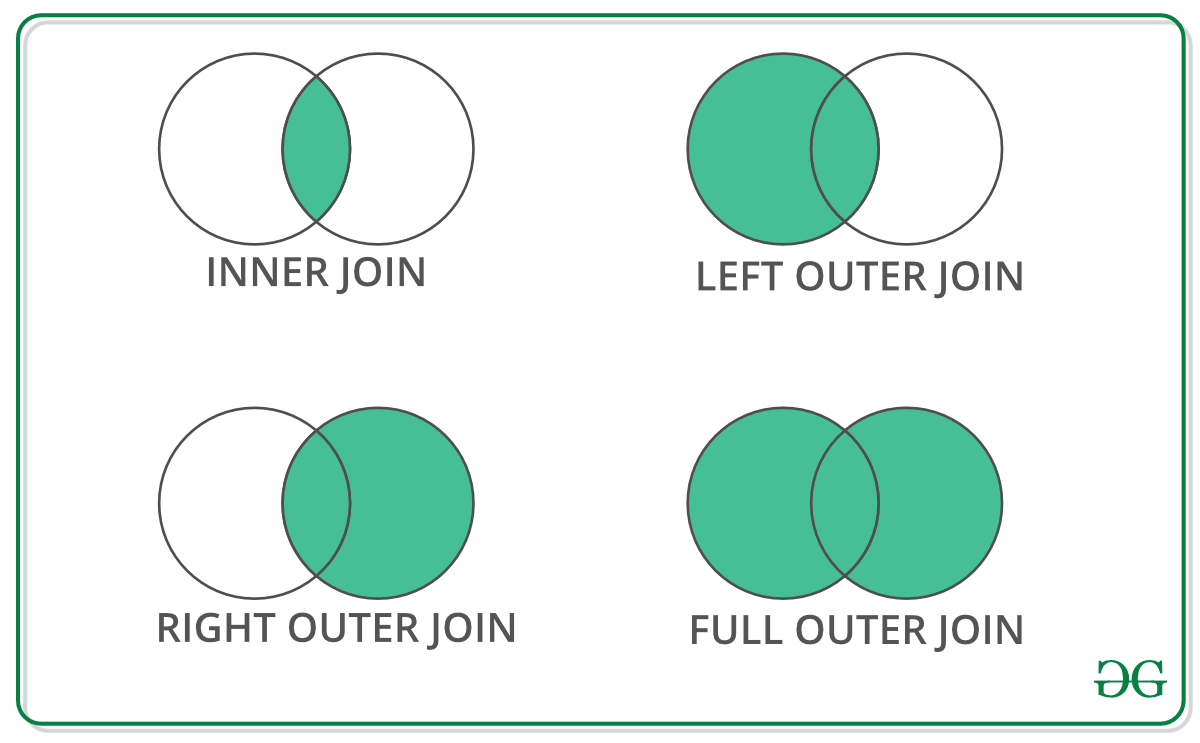

In [11]:
'''
fazendo consulta apelidando a taebla cliente com c
'''
consulta('''
SELECT c.nome
FROM cliente AS c;
''','''apelido''')

,nome
0,Ana Silva
1,Bruna Pereira
2,Túlio Nascimento
3,Fernando Souza
4,Lúcia Andrade


In [12]:
'''
faça uam consulta que retorne uma tebala com uma coluna de modelo
de carro e outra coluna de marca de carrro
'''
consulta('''
SELECT c.modelo, m.marca
FROM carro AS c
INNER JOIN marca AS m
ON c.codmarca = m.codmarca;
''','''inner_join''')

,modelo,marca
0,Ka,Ford
1,Argo,Fiat
2,Onix,Chevrolet
3,Polo,Volkswagen
4,Kwid,Renault


In [13]:
#por padrão a clásula JOIN e do tipo INNER
'''
faça uam consulta que retorne uma tebala com uma coluna de modelo
de carro e outra coluna de marca de carrro
'''
consulta('''
SELECT c.modelo, m.marca
FROM carro AS c
JOIN marca AS m
ON c.codmarca = m.codmarca;
''','''inner_join''')

,modelo,marca
0,Ka,Ford
1,Argo,Fiat
2,Onix,Chevrolet
3,Polo,Volkswagen
4,Kwid,Renault


In [14]:
'''
Inner Join

Agora, vamos a um exemplo mais complexo, em que desejamos visualizar o nome do
cliente e o modelo do carro alugado. Nesse caso, vamos precisar realizar dois
coamndos do JOIN
'''

consulta('''
SELECT cl.nome, ca.modelo
FROM cliente AS cl
JOIN aluguel AS al
 ON cl.codcliente = al.codcliente
 JOIN carro AS ca
 ON al.codcarro = ca.codcarro;

''','''complexo''')

,nome,modelo
0,Túlio Nascimento,Argo
1,Bruna Pereira,Ka
2,Bruna Pereira,Ka
3,Bruna Pereira,Onix
4,Ana Silva,Polo
5,Ana Silva,Polo
6,Ana Silva,Ka
7,Lúcia Andrade,Argo
8,Lúcia Andrade,Argo
9,Túlio Nascimento,Ka


In [15]:
'''
Left Join

Outro tipo de JOIN que pode ser usado é o LEFT JOIN, o qual pode ser muito útil em
casos em que é necessário retornar dados de uma tabela que não tenha correspondentes
em outra tabela.

Sintaxe:
SELECT colunas
FROM tabela_esquerda
LEFT JOIN tabela_direita
 ON tabela_esquerda.coluna_chave = tabela_direita.coluna_chave;

'''

'''
Quando executamos esse comando, são retornadas todas as linhas da tabela da esquerda,
mesmo que não haja correspondência na tabela da direita. Se não houver correspondência,
o SQL preencherá as colunas da tabela da direita com valores nulos.
'''

consulta('''
SELECT cl.nome, al.data_aluguel
FROM cliente AS cl
LEFT JOIN aluguel AS al
 ON cl.codcliente = al.codcliente;
''','''left''')

,nome,data_aluguel
0,Ana Silva,2023-04-05
1,Ana Silva,2023-04-13
2,Ana Silva,2023-04-15
3,Bruna Pereira,2023-04-02
4,Bruna Pereira,2023-04-03
5,Bruna Pereira,2023-04-04
6,Túlio Nascimento,2023-04-01
7,Túlio Nascimento,2023-04-25
8,Fernando Souza,None
9,Lúcia Andrade,2023-04-19


In [16]:
consulta('''
SELECT cl.nome, al.data_aluguel
FROM cliente AS cl
RIGHT JOIN aluguel AS al
 ON cl.codcliente = al.codcliente;
''','''right''')

,nome,data_aluguel
0,Túlio Nascimento,2023-04-01
1,Bruna Pereira,2023-04-02
2,Bruna Pereira,2023-04-03
3,Bruna Pereira,2023-04-04
4,Ana Silva,2023-04-05
5,Ana Silva,2023-04-13
6,Ana Silva,2023-04-15
7,Lúcia Andrade,2023-04-19
8,Lúcia Andrade,2023-04-21
9,Túlio Nascimento,2023-04-25


In [18]:
consulta('''
SELECT cl.nome, al.data_aluguel
FROM aluguel AS al
LEFT JOIN cliente AS cl
 ON cl.codcliente = al.codcliente;
 ''','''rigth_alternativo''')

,nome,data_aluguel
0,Túlio Nascimento,2023-04-01
1,Bruna Pereira,2023-04-02
2,Bruna Pereira,2023-04-03
3,Bruna Pereira,2023-04-04
4,Ana Silva,2023-04-05
5,Ana Silva,2023-04-13
6,Ana Silva,2023-04-15
7,Lúcia Andrade,2023-04-19
8,Lúcia Andrade,2023-04-21
9,Túlio Nascimento,2023-04-25
